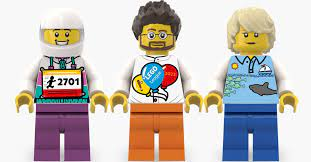

# Datasets

## lego_sets.csv contains following attributes: 
<ol> 
    <li> set_num </li>  
    <li> name </li>  
    <li> year </li>  
    <li> num_parts </li>  
    <li> theme_name </li>  
    <li> parent_theme </li>  
</ol>

## parent_theme.csv contains following attributes: 
<ol> 
    <li> id </li>  
    <li> name </li>  
    <li> is_liscensed </li>   
</ol>

## sets.csv contains following attributes: 
<ol> 
    <li> set_num </li>  
    <li> name </li>  
    <li> year </li>   
    <li> theme_id </li>   
    <li> num_parts </li>
</ol>

## themes.csv contains following attributes: 
<ol> 
    <li> id </li>  
    <li> name </li>  
    <li> parent_id </li>   
</ol>

## Questions to be answered are:
<ol> 
    <li><b> what percentage of all liscenced sets ever released were starwars themed? </b></li>
    <li><b> In which year was starwars not the most popular liscenced theme(in terms of no of sets released that year)? </b></li>
</ol>

## Import standard libraries 

In [1]:
import pandas as pd

## Read the dataset

In [2]:
df = pd.read_csv("C:\\Users\\SKUP\\OneDrive - Capco\\Desktop\\projects\\Python\\datasets\\lego_datasets\\lego_sets.csv")
theme_df = pd.read_csv("C:\\Users\\SKUP\\OneDrive - Capco\\Desktop\\projects\\Python\\datasets\\lego_datasets\\parent_themes.csv")

## check the first five rows

In [3]:
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [4]:
theme_df.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


## Merge the two dataframes and drop the repeating columns
### df - parent_theme and theme_df - name

In [5]:
merged_df = df.merge(theme_df,left_on='parent_theme',right_on='name')
merged_df.drop(columns=['name_y'],inplace=True)
merged_df.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


## check for null values in 'set_num' column

In [6]:
merged_df['set_num'].isnull().sum()

153

## Filter out 'is_liscensed' columns where it is true

In [7]:
licensed = merged_df[merged_df['is_licensed']]
licensed.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


## Drop the null values from 'set_num' column

In [8]:
licensed = licensed.dropna(subset=['set_num'])
licensed.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


## Filter out the starwars rows from the licensed dataframe

In [9]:
starwars = licensed[licensed['parent_theme']=='Star Wars']
starwars.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


## Check the length of the filtered dataframe

In [10]:
print(starwars.shape)
print(starwars.shape[0])

(609, 8)
609


In [11]:
#what percentage of all liscenced sets ever released were starwars themed?

the_force = (starwars.shape[0]/licensed.shape[0])*100

print(int(the_force))

51


## Sort the licensed data frame and group it by 'year' and 'parent_theme'

In [17]:
licensed_sorted = licensed.sort_values(by='year')
licensed_sorted['count'] = 1

#licensed_sorted.head()

summed_df = licensed_sorted.groupby(['year','parent_theme']).sum().reset_index()
summed_df.head()

,year,parent_theme,num_parts,id,is_licensed,count
0,1999,Star Wars,1384.0,2054,13,13
1,2000,Disney's Mickey Mouse,405.0,1940,5,5
2,2000,Star Wars,2580.0,4108,26,26
3,2001,Harry Potter,1284.0,2706,11,11
4,2001,Star Wars,2949.0,2212,14,14


## Drop the duplicates to get the first max occurance from each year

In [23]:
max_df = summed_df.sort_values('count',ascending=False).drop_duplicates(['year'])
max_df.head(50)

,year,parent_theme,num_parts,id,is_licensed,count
82,2017,Super Heroes,13123.0,34704,72,72
76,2016,Star Wars,6934.0,9638,61,61
67,2015,Star Wars,11410.0,9164,58,58
59,2014,Star Wars,8293.0,7110,45,45
47,2012,Star Wars,6769.0,6794,43,43
32,2009,Star Wars,3953.0,6162,39,39
52,2013,Star Wars,6159.0,5530,35,35
9,2003,Star Wars,6660.0,5056,32,32
42,2011,Star Wars,3451.0,5056,32,32
36,2010,Star Wars,6003.0,4740,30,30


In [24]:
#In which year was starwars not the most popular liscenced theme(in terms of no of sets released that year)?

new_era = 2017

## Break down number of sets by year

In [28]:
clean_df = merged_df[merged_df['set_num'].notnull()]
clean_df['count'] = 1

C:\Users\SKUP\AppData\Local\Temp/ipykernel_18700/2241816858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['count'] = 1


In [37]:
sets_per_year = clean_df.groupby(['year']).sum().reset_index()[['year','count']]
for index,row in sets_per_year.iterrows():
    print(row['year'],row['count'])

1950 7
1953 4
1954 14
1955 28
1956 12
1957 21
1958 42
1959 4
1960 3
1961 17
1962 40
1963 18
1964 11
1965 10
1966 89
1967 21
1968 25
1969 69
1970 29
1971 45
1972 38
1973 68
1974 39
1975 31
1976 68
1977 92
1978 73
1979 82
1980 88
1981 79
1982 76
1983 57
1984 76
1985 139
1986 123
1987 209
1988 68
1989 114
1990 85
1991 106
1992 115
1993 111
1994 128
1995 128
1996 144
1997 194
1998 325
1999 300
2000 327
2001 339
2002 447
2003 415
2004 371
2005 330
2006 283
2007 319
2008 349
2009 403
2010 444
2011 502
2012 615
2013 593
2014 715
2015 670
2016 608
2017 438
